In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
MejaBundar = cv2.imread('..\\img\\MejaBundar.png')
if MejaBundar is None:
    raise FileNotFoundError("Gambar '..\\img\\MejaBundar.png' tidak ditemukan.")
MejaBundar_Gray = cv2.cvtColor(MejaBundar, cv2.COLOR_BGR2GRAY)

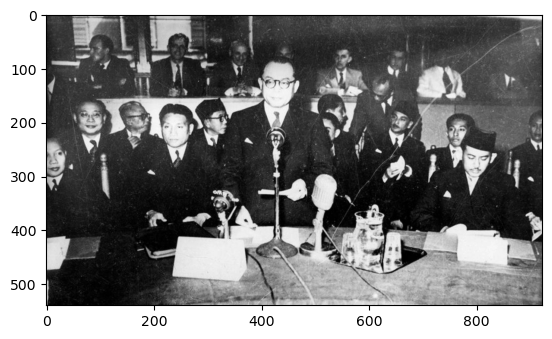

In [4]:
plt.imshow(MejaBundar_Gray, cmap='gray')

In [5]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [6]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=10, minSize=(25, 25))
    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 3)
    return face_img

In [7]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read(0)
    frame = adj_detect_face(frame)
    cv2.imshow('Face Detection', frame)
    k = cv2.waitKey(1)
    if k == ord("q"):  
        break
cap.release()
cv2.destroyAllWindows()